# TestDatset

En la presente sección haremos un análisis exploratorio del conjunto de test Sigcomp2009 y extraeremos las features del mismo utilizando el método de grilla circular.

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

import sys; print(sys.version)
import os
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'pycode'))
from import_all_notebook_hook import *

3.8.1 (default, Jan  8 2020, 22:29:32) 
[GCC 7.3.0]


/home/marian/anaconda3/envs/firmas/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
TEST_PATH = './test/genuines-test'
PREPROCESSED_PATH='./test/preprocessed-test'
FEATURES_PATH = './test/test-features-16'

raw_dataset = load_dataset_sigComp2009Test(TEST_PATH)
print("Lodaded {} files. Authors: {}".format(len(flatten_dataset(raw_dataset)), len(raw_dataset)))

Lodaded 940 files. Authors: 79


## Visualizacion

Vemos como lucen algunas firmas del dataset ante los diferentes métodos de preprocesamiento.

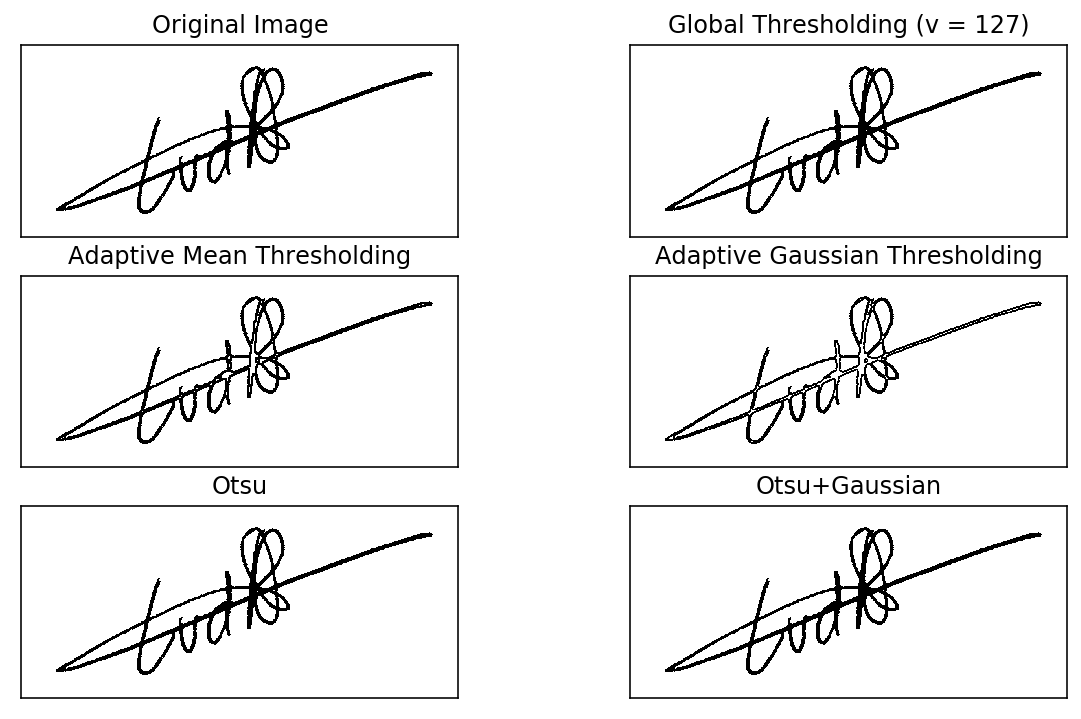

In [8]:
pa_witness = random.choice(list(raw_dataset))
image_fp = random.choice(list(raw_dataset[pa_witness][pa_witness].values()))
img = Image.open(image_fp)
preprocess_choose(img)

## Preprocesamiento

Es importante que el conjunto de test reciba el mismo tratamiento (preprocesamiento, escalamiento, normalización, etc) que el entrenamiento.

En la carpeta Sigcomp2009/backups hemos guardado los preprocesamientos para el conjunto de test.

In [4]:
empty_dir(PREPROCESSED_PATH)

preprocess_dataset = parallel_process_hook(preprocess_callback, output_dir=PREPROCESSED_PATH,\
                                           dataset=raw_dataset, chunk_size=128, initial_chunk=0,\
                                           session_path_in=None, session_path_out=None)
a = flatten_dataset(raw_dataset)
b = flatten_dataset(preprocess_dataset)
sa = { (pa, sa, sid, os.path.basename(data)) for pa, sa, sid, data in a }
sb = { (pa, sa, sid, os.path.basename(data)) for pa, sa, sid, data in b }
assert sa==sb

Are you sure to delete ./test/preprocessed-test-16? ['yes' for yes]
yes
Session created:
- session input filepath "/home/marian/Escritorio/tesina/firmas-votacion/Sigcomp2009/map_session_inhduhwaym.pkl", 
- session output filepath "/home/marian/Escritorio/tesina/firmas-votacion/Sigcomp2009/map_session_outalpqy3x0.pkl", 
- datset_len: 940 chunk_size: 128, N_chunks: 8
Are you sure to delete ./test/preprocessed-test-16? ['yes' for yes]
yes
Finished processing chunk 0
Finished processing chunk 1
Finished processing chunk 2
Finished processing chunk 3
Finished processing chunk 4
Finished processing chunk 5
Finished processing chunk 6
Finished processing chunk 7


Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/pool.py", line 689, in _terminate_pool
    cls._help_stuff_finish(inqueue, task_handler, len(pool))
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/pool.py", line 674, in _help_stuff_finish
    inqueue._rlock.acquire()
KeyboardInterrupt: 
Process ForkPoolWorker-2:
Process ForkPoolWorker-5:
Process ForkPoolWorker-7:
Process ForkPoolWorker-8:
Process ForkPoolWorker-6:
Process ForkPoolWorker-3:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  Fil

SUCESS! Result len: 940


KeyboardInterrupt
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return s

Vemos luego que han sido correctamente preprocesados.

In [12]:
""" Load preprocessed dataset. """
preprocess_dataset = load_dataset_sigComp2009Test(PREPROCESSED_PATH)
print("Lodaded {} files.".format(len(flatten_dataset(preprocess_dataset)))) 

Lodaded 940 files.


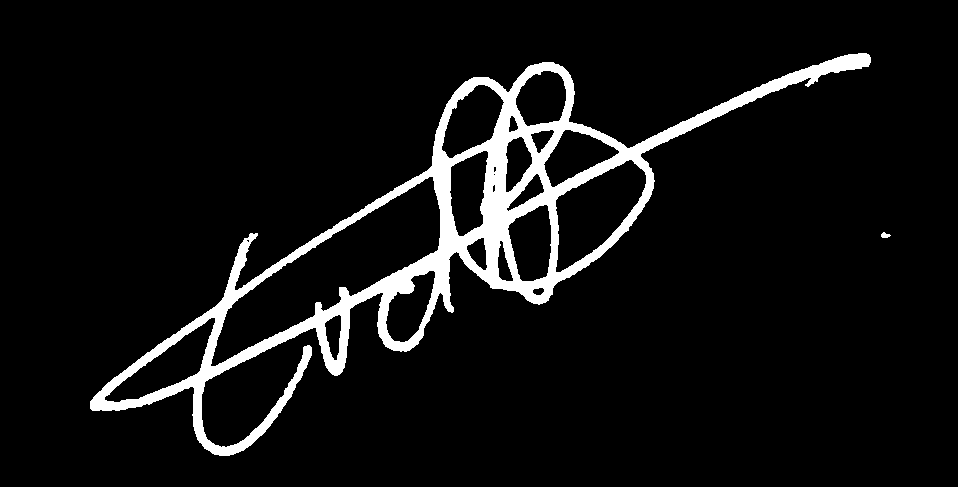

In [13]:
""" Show preprocessed image. """
image_fp = random.choice(list(preprocess_dataset[pa_witness][pa_witness].values()))
img_preprocessed = Image.open(image_fp)
img_preprocessed

## Extracción de features

En nuestro entrenamiento hemos elegido usar grilla circular de 16 divisiones. Extraemos las features del conjunto de test usando dicha grilla (para eso modificamos en features_grid N_DIVISIONS).

No se realiza data augmentation sobre el conjunto de test (data augmentation sólo es para aumentar la cantidad de datos a entrenar). Se supone que el conjunto de test es lo suficientemente representativo, independiente de los datos de entrenamiento y desafiante para medir la capacidad del modelo propuesto a generalizar.

In [10]:
""" Extract the features. """
empty_dir(FEATURES_PATH)
features_dataset = parallel_process_hook(features_extraction_callback, output_dir=FEATURES_PATH,\
                                         dataset=preprocess_dataset, chunk_size=8, initial_chunk=0,\
                                         session_path_in=None, session_path_out=None)

Are you sure to delete ./test/features-test-16? ['yes' for yes]
yes
Session created:
- session input filepath "/home/marian/Escritorio/tesina/firmas-votacion/Sigcomp2009/map_session_inleyul2qr.pkl", 
- session output filepath "/home/marian/Escritorio/tesina/firmas-votacion/Sigcomp2009/map_session_oute7y7d7vi.pkl", 
- datset_len: 940 chunk_size: 8, N_chunks: 118
Are you sure to delete ./test/features-test-16? ['yes' for yes]
yes
('023', '023', '09')
('023', '023', '06')
('023', '023', '04')
('023', '023', '08')
('023', '023', '10')
('023', '023', '02')
('023', '023', '11')
('023', '023', '12')


Process ForkPoolWorker-13:
Process ForkPoolWorker-11:
Process ForkPoolWorker-9:
Process ForkPoolWorker-12:
Process ForkPoolWorker-10:
Process ForkPoolWorker-15:
Traceback (most recent call last):
Process ForkPoolWorker-16:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-14:
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/multiprocessing/process.py", line 315, in _bootst

  File "/home/marian/Escritorio/tesina/firmas-votacion/pycode/tools.py", line 51, in points_angle
    angle = atan2(np.cross(oa,ob), np.dot(oa,ob))
  File "/home/marian/Escritorio/tesina/firmas-votacion/pycode/features_grid.py", line 30, in __init__
    point_angle = positive_angle(points_angle(self.center + np.array([0,1]),
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/site-packages/numpy/core/numeric.py", line 1574, in cross
    cp -= a1 * b0
  File "<__array_function__ internals>", line 5, in moveaxis
KeyboardInterrupt
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/site-packages/numpy/core/numeric.py", line 1540, in cross
    a = moveaxis(a, axisa, -1)
  File "/home/marian/Escritorio/tesina/firmas-votacion/pycode/features_grid.py", line 30, in __init__
    point_angle = positive_angle(points_angle(self.center + np.array([0,1]),
  File "<__array_function__ internals>", line 5, in cross
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/site-packages/numpy/c

KeyboardInterrupt: 

  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/site-packages/numpy/core/numeric.py", line 1540, in cross
    a = moveaxis(a, axisa, -1)
  File "<__array_function__ internals>", line 5, in moveaxis
  File "<__array_function__ internals>", line 5, in moveaxis
  File "<__array_function__ internals>", line 5, in cross
KeyboardInterrupt
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/site-packages/numpy/core/numeric.py", line 1401, in moveaxis
    for dest, src in sorted(zip(destination, source)):
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/site-packages/numpy/core/numeric.py", line 1540, in cross
    a = moveaxis(a, axisa, -1)
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/site-packages/numpy/core/numeric.py", line 1394, in moveaxis
    destination = normalize_axis_tuple(destination, a.ndim, 'destination')
KeyboardInterrupt
  File "<__array_function__ internals>", line 5, in moveaxis
  File "/home/marian/anaconda3/envs/firmas/lib/python3.8/site-pac

## Generación de DataSet y evaluación

Generamos nuestro conjunto de datos de pares de firma usando la misma configuración de balanceo y normalización que hemos hallado usando el conjunto de entrenamiento y validación.

Usamos DataSetConstructor con test_ratio=0 para construir un solo dataset y que todos los datos sean normalizados.

Finalmente evaluamos en el modelo 'TODO_FINAL_MODEL' que obtuvo los mejores resultados.

In [3]:
""" Load features file dataset. """
features_dataset = load_dataset_sigComp2009Test(FEATURES_PATH, extension='pkl')
print("Lodaded {} files.".format(len(flatten_dataset(features_dataset))))
N_divisions, CANT_FEATURES, to_features = feature_dataset_parameters(features_dataset)

Lodaded 940 files.
N_divisions:{16}
Signature types: 79
Cant_features:{3}
N_division check:{16}


In [4]:
feature_obtainer_factory = lambda features_normal: FeatureObtainer_Difference( DataToFeatures_Features(features_normal) )
data_constructor = DataSetConstructor(feature_obtainer_factory,  'UNDERSAMPLE', features_dataset, to_features, QuantileTransformer,test_ratio = 0)
ds = data_constructor.construct_datasets()
print('Train len: {} | Test len: {}'.format(len(ds.trainData),len(ds.testData)))

Train len: 10282 | Test len: 0


In [5]:
import joblib
clf = joblib.load('my_model_nonaugmentation.joblib')
RECALL_REQUIRED = 0.9
score_function = precision_by_recall_score_factory(RECALL_REQUIRED)
print('{} precision for {} recall'.format(score_function(clf,ds.trainData,ds.trainLabel),RECALL_REQUIRED))

0.8534069981583794 precision for 0.9 recall


### Curva Precision - Recall 

Miramos la curva precision vs recall variando la sensibilidad del clasificador binario para asegurarnos que nuestro compromiso es razonable. 

Podría jugar con los valores de recall que se desea para obtener otros valores de precision.

Precision at recall 0.9: 0.8534069981583794


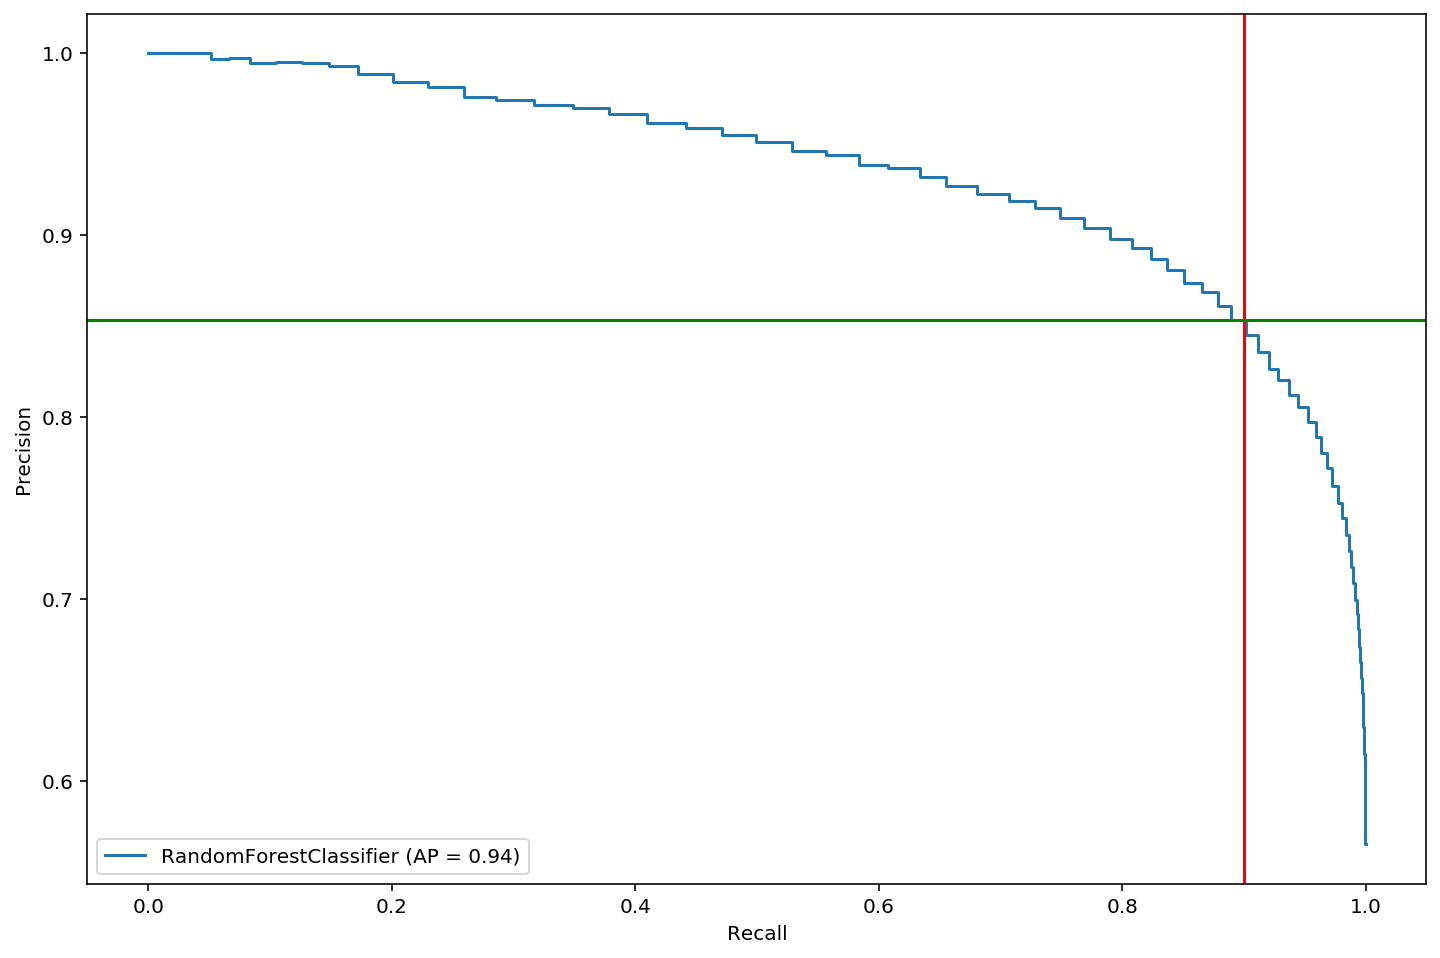

In [8]:
precision_recall_plot(clf, ds.trainData,ds.trainLabel, 0.9)

## Conclusiones

Finalmente podemos decir que se ha encontrado un método que caputa el 90% de los erroes (firmas no coincidentes) con una precisión del 15%. Si podemos repetir los mismos resultados con los telegramas será un panorama alentador: reducirimos la retransmisiones a un 10% y arrojando tan solo 3 de cada 20 falsas alarmas.

TODO ESTADO DEL ARTE

Queremos recalcar lo importante que fue el proceso iterativo por el que hemos hallado el modelo final. Implementando varias técnicas que han contruibuido en gran medida a la accuracy obtenida.